<a href="https://colab.research.google.com/github/justice-7/Data-Analysis-Programming/blob/main/Lecture10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

In contrast to *supervised* machine learning, *unsupervised* learning is used when there is no "ground truth" from which to train and validate label predictions.

The most common form of unsupervised learning is *clustering*, which is simllar conceptually to *classification*, except that the the training data does not include known values for the class label to be predicted.

Clustering works by separating the training cases based on similarities that can be determined from their feature values.

## Seed dataset
Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes, and can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml).

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/ml-basics/master/data/seeds.csv')

data.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


## Visualization - Scatter Plot

As you can see, the dataset contains six data points (or *features*) for each instance (*observation*) of a seed. So you could interpret these as coordinates that describe each instance's location in six-dimensional space.

Now, of course six-dimensional space is difficult to visualise in a three-dimensional world, or on a two-dimensional plot. We should take advantage of a dimensionality reduction technique, however we did not cover yet.

Alternatively, we just chose choose two variable (`area`, `groove_length`) visualize the data.

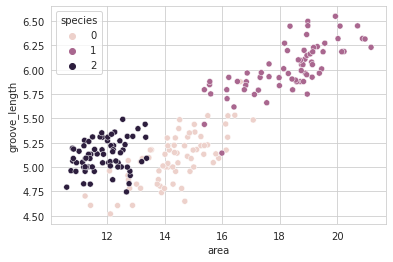

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.scatterplot(x='area', y='groove_length', data=data, hue='species')
plt.show()

## Set up DataFrame
Drop `species` values from DataFrame

In [3]:
X = data.drop(columns='species')
X.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


## How many clusters?

Hopefully you can see at least two, arguably three, reasonably distinct groups of data points; but here lies one of the fundamental problems with clustering - without known class labels, how do you know how many clusters to separate your data into?

One way we can try to find out is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. A metric often used to measure this tightness is the `within cluster sum of squares` (WCSS), with lower values meaning that the data points are closer. You can then plot the WCSS for each model.

$WCSS = \sum_{j=1}^k\sum_{i}^n\mathrm{dist}(x_i, C_j)^2$

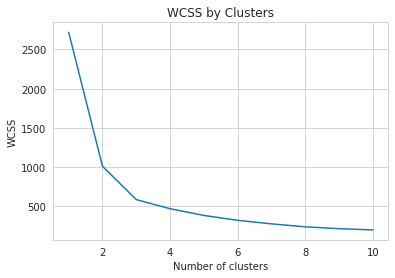

In [4]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(X.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The plot shows a large reduction in WCSS (so greater *tightness*) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.

## K-Means Clustering

The algorithm we used to create our test clusters is *K-Means*. This is a commonly used clustering algorithm that separates a dataset into *K* clusters of equal variance. The number of clusters, *K*, is user defined. The basic algorithm has the following steps:

**[TODO]** Let's try using K-Means on our seeds data with a `K` value of 3 with `random_state=0`.

In [33]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=3, random_state=0)

# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(X)

# Assign the cluster
X_withCluster = X.copy()
X_withCluster['km_clusters'] = km_clusters

## Hierarchical Clustering

Hierarchical clustering methods make fewer distributional assumptions when compared to K-means methods. However, K-means methods are generally more scalable, sometimes very much so.

### Agglomerative Nesting (AGNES) Clustering 
**[TODO]** Let's try using AGNES on our seeds data with a `average` linkage.


In [34]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3, linkage='average')
agg_clusters = agg_model.fit_predict(X)

X_withCluster['agg_clusters'] = agg_clusters

## Visulize the Clustering Results

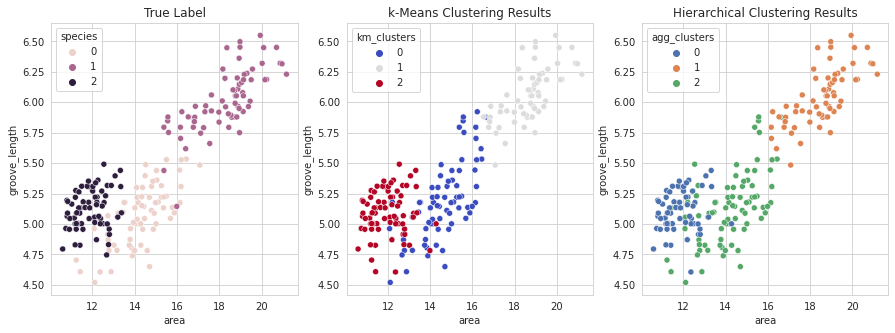

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.scatterplot(x='area', y='groove_length', data=data, hue='species',
           ax=ax[0])
sns.scatterplot(x='area', y='groove_length', data=X_withCluster, hue='km_clusters',
           palette='coolwarm', ax=ax[1])
sns.scatterplot(x='area', y='groove_length', data=X_withCluster, hue='agg_clusters',
           palette='deep', ax=ax[2])
ax[0].set(title='True Label')
ax[1].set(title='k-Means Clustering Results')
ax[2].set(title='Hierarchical Clustering Results')

plt.show()

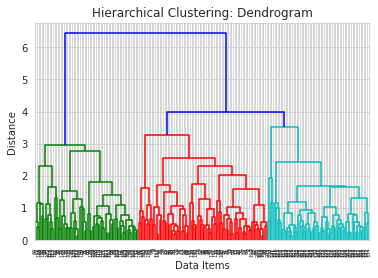

In [36]:
# Import dendrogram
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# create dendrogram using ward linkage
dendrogram(linkage(X.values, method='average'), color_threshold=4)

# Set title of the plot
plt.title('Hierarchical Clustering: Dendrogram')
plt.xlabel('Data Items')
plt.ylabel('Distance')
plt.show()

# Evaluation

**[TODO]** Internal Evaluation with `Silhouette Score`

In [37]:
from sklearn.metrics import silhouette_score

print('silhouette of kMeans: %f'%silhouette_score(X, km_clusters))
print('silhouette of Hierarchical Clustering: %f'%silhouette_score(X, agg_clusters))

silhouette of kMeans: 0.471934
silhouette of Hierarchical Clustering: 0.458112


**[TODO]** External Evaluation with `F1 Score`

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

target = data.species
print('kMeans')
print(classification_report(target, km_clusters))

_agg_clusters = agg_clusters.copy()
_agg_clusters[agg_clusters==0]=2
_agg_clusters[agg_clusters==2]=0

print('Hierarchical Clustering')
print(classification_report(target, _agg_clusters))

kMeans
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        70
           1       0.98      0.86      0.92        70
           2       0.88      0.97      0.93        70

    accuracy                           0.90       210
   macro avg       0.90      0.90      0.90       210
weighted avg       0.90      0.90      0.90       210

Hierarchical Clustering
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        70
           1       0.98      0.91      0.95        70
           2       0.95      0.87      0.91        70

    accuracy                           0.91       210
   macro avg       0.92      0.91      0.91       210
weighted avg       0.92      0.91      0.91       210

